### Checking Versions

In [1]:
# Python : 
import sys
print('Python {}'.format(sys.version))

#scipy
import scipy
print('scipy {}'.format(scipy.__version__))

#numpy
import numpy
print('numpy {}'.format(numpy.__version__))

#matplotlib
import matplotlib
print('Matplotlib {}'.format(matplotlib.__version__))

# Pandas
import pandas
print('Pandas {}'.format(pandas.__version__))

# scikit learn
import sklearn
print('Scikit-learn {}'.format(sklearn.__version__))

Python 3.10.9 (main, Mar  1 2023, 18:23:06) [GCC 11.2.0]
scipy 1.10.0
numpy 1.23.5
Matplotlib 3.7.0
Pandas 1.5.3
Scikit-learn 1.2.1


### Loading Libraries

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
dataset = pd.read_csv('iris.csv')
dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# To find all the  columns of a dataset -> 
# column_names = dataset.columns.tolist()
# column_names

In [4]:
# Setting Meaningful names of columns
names = ['Sepal-Length','Sepal-Width','Petal-Length','Petal-Width','Class']
dataset = pd.read_csv('iris.csv', names = names)
dataset

,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# Row and columns present
print(dataset.shape)

(150, 5)


In [6]:
print(dataset.head(10))

   Sepal-Length  Sepal-Width  Petal-Length  Petal-Width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [7]:
print(dataset.describe())

       Sepal-Length  Sepal-Width  Petal-Length  Petal-Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [8]:
# Instance of a particular field
print(dataset.groupby('Class').size())
# This will give us the size of each class

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


#### Univariant Plots

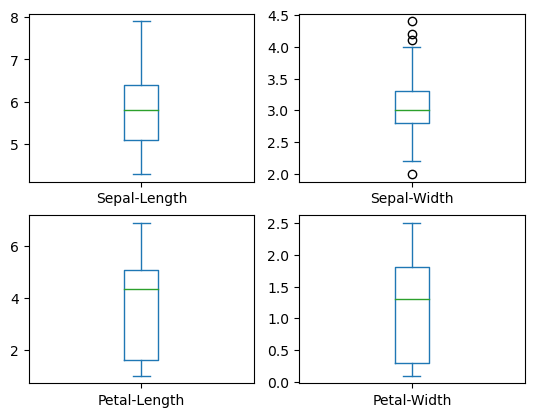

In [10]:
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)

# If (4,4) is used then all graph will be in smae line -> (2,2) means we want 2 plots in two lines each

# sharex and sharey if True then 8 7 6 5 will be used for both Sepal-Length and Sepal-Width -> Poor Visulization will appear
plt.show()


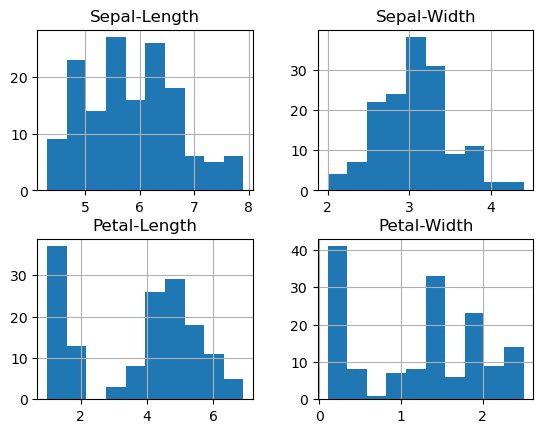

In [11]:
# A Histogram
dataset.hist()
plt.show()

#### Multivariant Plots

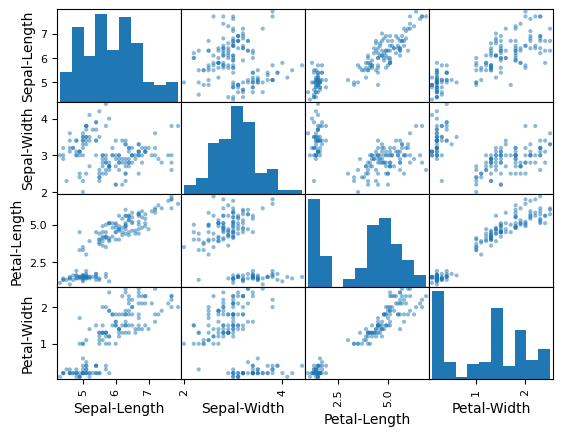

In [36]:
# Scatter matrix
scatter_matrix(dataset)
plt.show()

#### Creating Validation/Training dataset

 We will split the data into training and validation sets. The ratio of 80:20
 is a common practice in machine learning for splitting datasets, where we train our model on 80% of the available data to learn from it while validating or testing its performance using remaining is a commonly used one for image classification tasks, but it can be adjusted depending on your specific needs

In [12]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 6  #Random generation -> Hepls  to keep same randomness in training and testng the dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)  # Data is spillted into 80:20 ratio

#### Test Harness

It will split the dataset into 10 parts -> Train on the 9 part nad test on the 1 part and this will be repeated for all combination of train and test

In [13]:
seed = 6
scoring = 'accuracy'
# The matrix of accuracy is used to evalute the performance of each model. It is the ratio of correctly predicted instances / Total no of instances in the dataset * 100 

#### Building Model using 6 different Algorithm
Since we do not know which algorithm would be best suited for the model we are using different algorithms

In [14]:
models = []
models.append(('Logistic_Regression', LogisticRegression(max_iter = 1000))) # If this is not max_iter = 1000 -> NOt given -> Some warning will be generated int he next code
models.append(('Linear_Discriminant_Analysis', LinearDiscriminantAnalysis()))
models.append(('K_Neighbors_Classifier', KNeighborsClassifier()))
models.append(('Descision_Tree_Classifier', DecisionTreeClassifier()))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('Support_Vector_Machine', SVC()))

In [15]:
# Evaluation of each model

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, shuffle = True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:  %f  (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic_Regression:  0.950000  (0.055277)
Linear_Discriminant_Analysis:  0.975000  (0.053359)
K_Neighbors_Classifier:  0.958333  (0.041667)
Descision_Tree_Classifier:  0.916667  (0.074536)
Naive_Bayes:  0.966667  (0.040825)
Support_Vector_Machine:  0.950000  (0.055277)


#### Here, Linear_Discriminant_Analysis has the most accuracy